In [1]:
from sklearn import preprocessing
from scipy import signal, interpolate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import rfft, rfftfreq #outputs half

import plot_arm as p
import csv_tangenting as t

In [ ]:
def freqplot(peaksX, rr_ints,wlen,overlp):# Example of ScyPy spectrogram
    ts =  peaksX
    av_fs = len(ts) / (ts[-1] - ts[0]) # Average sampling rate
    sr2 = 3*av_fs # New sampling rate
    rr_int = interpolate.interp1d(ts, rr_ints)(np.arange(ts[0], ts[-1], 1/sr2)) # Interpolated RR intervals
    len_window = int(wlen*sr2)  # Window length in seconds
    overlap = int(overlp*sr2) # Overlap in seconds
    freq, temp, Sxx = signal.spectrogram(
        rr_int,
        sr2,
        nperseg=len_window,
        noverlap=overlap
    )
    dBS = 10 * np.log10(Sxx)  # convert to dB
    # Plot spectrogram
    #plt.plot(np.arange(ts[0], ts[-1], 1/sr2),rr_int)
    fig = plt.figure()
    plt.pcolormesh(temp, freq, dBS, cmap="jet")
    plt.title("freqs")
    plt.ylabel("Frequency [Hz]")
    plt.show()

In [2]:
# Reading the data from CSV
#repo = pd.read_csv('/Users/HAQbook/Documents/GitHub/sproj/second_attempt/data/piano01_003interp.csv',sep=',',header=0)
def np_piece_data_from_csv(num, piece):
    path = '/Users/HAQbook/Documents/GitHub/sproj/second_attempt/data/'
    filename = 'piano01_00'+str(piece)+'_p'+str(num) #performance number 1-6
    repo = pd.read_csv(path+filename+'.csv',sep=',',header=0)
    columns=['Frame', 'Time (Seconds)']
    repo = repo.drop(columns, axis=1)
    #repo = repo.drop(index=[0,1])
    vals = repo.to_numpy(dtype=float)
    return(repo,vals)

'''-------------CHOICES--------------'''
angLSHO = ["LASI","LSHO","LELB"]
angLELB = ["LSHO","LELB","LWRA"]
angLWRA = ["LELB","LWRA","LFIN"]
angRSHO = ["RASI","RSHO","RELB"]
angRELB = ["RSHO","RELB","RWRA"]
angRWRA = ["RELB","RWRA","RFIN"]

coarseness = 20 #min: 5 

angLST = [angLSHO,angLELB,angLWRA,angRSHO,angRELB,angRWRA] # list of angles to loop through
pieceLST = [1,2,3,5,6]


<function matplotlib.pyplot.show(close=None, block=None)>

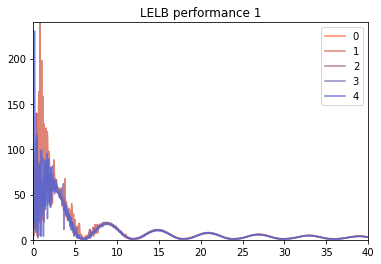

In [12]:
# single frequency plot for fixed angle and performance
perf = 1
angpick = angLELB
# the 6 performances of a piece; repo(df) and vals(np array)
p1,p2,p3,p5,p6 = np_piece_data_from_csv(perf,1),np_piece_data_from_csv(perf,2),np_piece_data_from_csv(perf,3),np_piece_data_from_csv(perf,5),np_piece_data_from_csv(perf,6) # one performance from each of the 5 pieces

limbName = angpick[1]
a1,a2,a3,a5,a6 = p.getDegrees2D(p1[0], p1[1], angpick),p.getDegrees2D(p2[0], p2[1], angpick),p.getDegrees2D(p3[0], p3[1], angpick),p.getDegrees2D(p5[0], p5[1], angpick),p.getDegrees2D(p6[0], p6[1], angpick)
arrayLST = [a1,a2,a3,a5,a6]
arrayLSTsmoothed = t.callDeriv(arrayLST,smoothed=True)

for j,ang in enumerate(arrayLSTsmoothed):
    sr = 240
    N = np.size(arrayLSTsmoothed[j],0) # number of samples
    yf = rfft(ang)
    xf = rfftfreq(N, 1/sr)
    plt.plot(xf, np.abs(yf),color=((6-j)/6,0.4,(j+1)/6,0.8), label=j) # generate plot, abs because yfs are complex
plt.legend()
plt.title(str(limbName +" performance " +str(perf)))
plt.xlim(0,40)
plt.ylim(0,240)
    #plt.savefig('/Users/HAQbook/Desktop/graaaaphs/frequencies_piece'+str(piece)+'.png')
plt.show()


In [ ]:
plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)

In [ ]:
# single frequency plot for fixed piece and performance
piece = 3
perf = 3
p1 = np_piece_data_from_csv(perf,piece)
plt.clf() 

for j,angpick in enumerate(angLST):
    limbName = angpick[1]
    a = p.getDegrees2D(p1[0], p1[1], angpick)
    asmoothed = t.callDeriv([a],smoothed=True)
    sr = 240
    N = np.size(asmoothed[0]) # number of samples
    yf = rfft(asmoothed[0])
    xf = rfftfreq(N, 1/sr)
    plt.plot(xf, np.abs(yf),color=((6-j)/6,0.4,(j+1)/6,0.8), label=limbName) # generate plot, abs because yfs are complex
    print(limbName)
plt.legend()
plt.title(str(" performance " +str(perf) +" piece " +str(piece)))
plt.xlim(0,10)
plt.ylim(0,240)
    #plt.savefig('/Users/HAQbook/Desktop/graaaaphs/frequencies_piece'+str(piece)+'.png')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

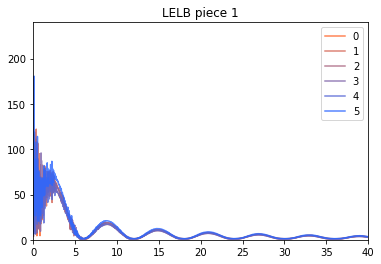

In [5]:
# single frequency plot for fixed piece and angle
piece = 1
angpick = angLELB
# the 6 performances of a piece; repo(df) and vals(np array)
p1,p2,p3,p4,p5,p6 = np_piece_data_from_csv(1,piece),np_piece_data_from_csv(2,piece),np_piece_data_from_csv(3,piece),np_piece_data_from_csv(4,piece),np_piece_data_from_csv(5,piece),np_piece_data_from_csv(6,piece) # the 6 performances of a piece; repo(df) and vals(np array)

limbName = angpick[1]
a1,a2,a3,a4,a5,a6 = p.getDegrees2D(p1[0], p1[1], angpick),p.getDegrees2D(p2[0], p2[1], angpick),p.getDegrees2D(p3[0], p3[1], angpick),p.getDegrees2D(p4[0], p4[1], angpick),p.getDegrees2D(p5[0], p5[1], angpick),p.getDegrees2D(p6[0], p6[1], angpick)
arrayLST = [a1,a2,a3,a4,a5,a6]
arrayLSTsmoothed = t.callDeriv(arrayLST,smoothed=True)

for j,ang in enumerate(arrayLSTsmoothed):
    sr = 240
    N = np.size(arrayLSTsmoothed[j],0) # number of samples
    yf = rfft(ang)
    xf = rfftfreq(N, 1/sr)
    plt.plot(xf, np.abs(yf),color=((6-j)/6,0.4,(j+1)/6,0.8), label=j) # generate plot, abs because yfs are complex
plt.legend()
plt.title(str(limbName +" piece " +str(piece)))
plt.xlim(0,40)
plt.ylim(0,240)
    #plt.savefig('/Users/HAQbook/Desktop/graaaaphs/frequencies_piece'+str(piece)+'.png')
plt.show()



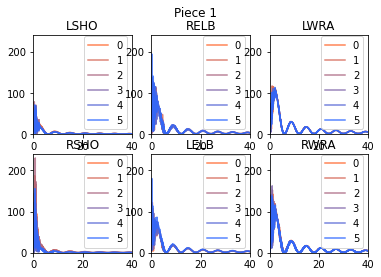

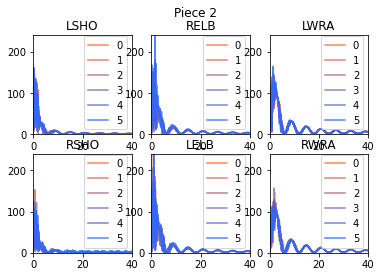

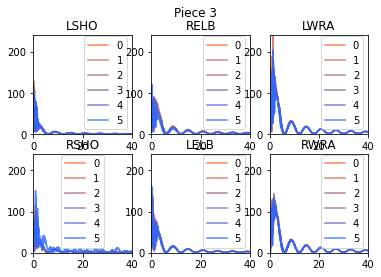

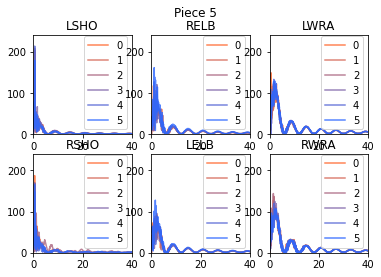

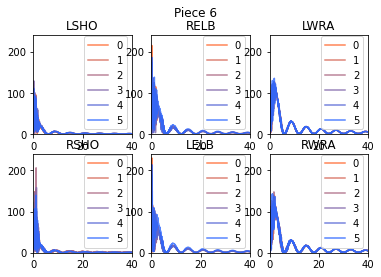

In [22]:
# frequencies by performance 
for piece in pieceLST:
    # the 6 performances of a piece; repo(df) and vals(np array)
    p1,p2,p3,p4,p5,p6 = np_piece_data_from_csv(1,piece),np_piece_data_from_csv(2,piece),np_piece_data_from_csv(3,piece),np_piece_data_from_csv(4,piece),np_piece_data_from_csv(5,piece),np_piece_data_from_csv(6,piece) # the 6 performances of a piece; repo(df) and vals(np array)

    fig, axs = plt.subplots(2, 3)
    fig.suptitle('Piece '+str(piece))
    for i,ang in enumerate(angLST):
        angpick = ang
        limbName = angpick[1]
        a1,a2,a3,a4,a5,a6 = p.getDegrees2D(p1[0], p1[1], angpick),p.getDegrees2D(p2[0], p2[1], angpick),p.getDegrees2D(p3[0], p3[1], angpick),p.getDegrees2D(p4[0], p4[1], angpick),p.getDegrees2D(p5[0], p5[1], angpick),p.getDegrees2D(p6[0], p6[1], angpick)
        arrayLST = [a1,a2,a3,a4,a5,a6]
        arrayLSTsmoothed = t.callDeriv(arrayLST,smoothed=True)

        for j,ang in enumerate(arrayLSTsmoothed):
            sr = 240
            N = np.size(arrayLSTsmoothed[j],0) # number of samples

            yf = rfft(ang)
            xf = rfftfreq(N, 1/sr)
            axs[i%2, i%3].plot(xf, np.abs(yf),color=((6-j)/6,0.4,(j+1)/6,0.8), label=j) # generate plot, abs because yfs are complex
        axs[i%2, i%3].legend()
        axs[i%2, i%3].set_title(str(limbName))
        axs[i%2, i%3].set_xlim(0,40)
        axs[i%2, i%3].set_ylim(0,240)
    #plt.savefig('/Users/HAQbook/Desktop/graaaaphs/frequencies_piece'+str(piece)+'.png')
    plt.show



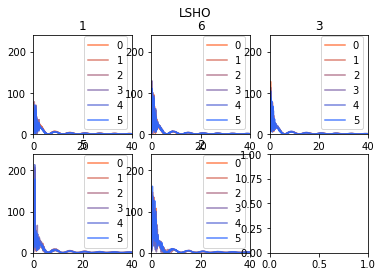

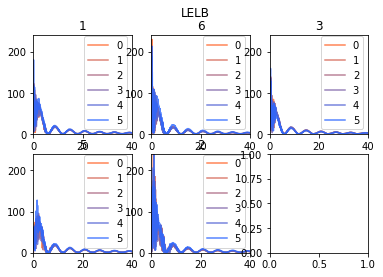

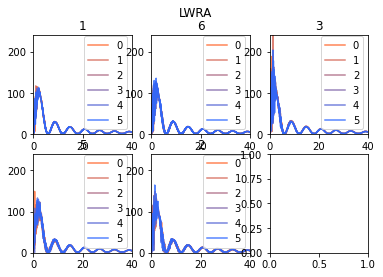

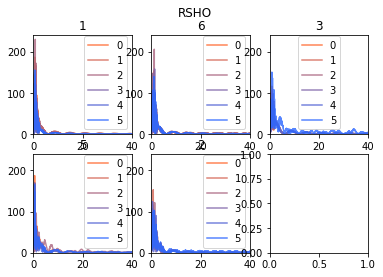

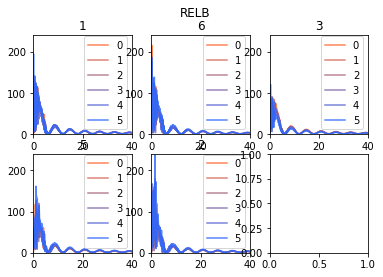

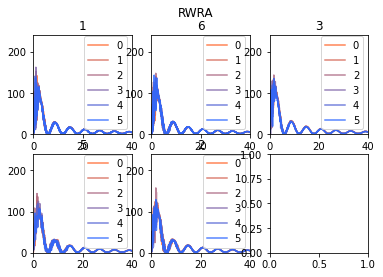

In [23]:
# frequencies by limb 
for angpick in angLST:
    fig, axs = plt.subplots(2, 3)
    limbName = angpick[1]
    fig.suptitle(limbName)
    # the 6 performances of a piece; repo(df) and vals(np array)
    for i,piece in enumerate(pieceLST):
        p1,p2,p3,p4,p5,p6 = np_piece_data_from_csv(1,piece),np_piece_data_from_csv(2,piece),np_piece_data_from_csv(3,piece),np_piece_data_from_csv(4,piece),np_piece_data_from_csv(5,piece),np_piece_data_from_csv(6,piece) # the 6 performances of a piece; repo(df) and vals(np array)
        a1,a2,a3,a4,a5,a6 = p.getDegrees2D(p1[0], p1[1], angpick),p.getDegrees2D(p2[0], p2[1], angpick),p.getDegrees2D(p3[0], p3[1], angpick),p.getDegrees2D(p4[0], p4[1], angpick),p.getDegrees2D(p5[0], p5[1], angpick),p.getDegrees2D(p6[0], p6[1], angpick)
        arrayLST = [a1,a2,a3,a4,a5,a6]
        arrayLSTsmoothed = t.callDeriv(arrayLST,smoothed=True)

        for j,ang in enumerate(arrayLSTsmoothed):
            sr = 240
            N = np.size(arrayLSTsmoothed[j],0) # number of samples

            yf = rfft(ang)
            xf = rfftfreq(N, 1/sr)
            axs[i%2, i%3].plot(xf, np.abs(yf),color=((6-j)/6,0.4,(j+1)/6,0.8), label=j) # generate plot, abs because yfs are complex
        axs[i%2, i%3].legend()
        axs[i%2, i%3].set_title('Piece '+str(piece))
        axs[i%2, i%3].set_xlim(0,40)
        axs[i%2, i%3].set_ylim(0,240)
    #plt.savefig('/Users/HAQbook/Desktop/graaaaphs/frequencies_piece'+str(piece)+'.png')
    plt.show


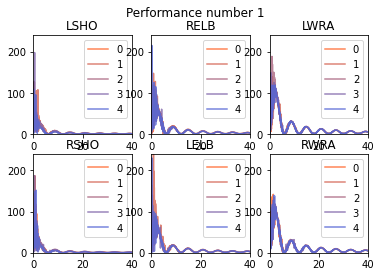

In [8]:
# by performance number
for perf in range(1,2):
    fig, axs = plt.subplots(2, 3)
    fig.suptitle('Performance number '+str(perf))

    dat = [] # data of that performance for each piece
    for piece in pieceLST: 
        dat.append(np_piece_data_from_csv(perf,piece))

    for i,ang in enumerate(angLST): #angles for each limb for that performance of each piece
        angpick = ang
        limbName = angpick[1] 
        arrayLST = [p.getDegrees2D(dat[l][0],dat[l][1], angpick) for l in range(len(pieceLST))]
        arrayLSTsmoothed = t.callDeriv(arrayLST,smoothed=True)

        for j,ang in enumerate(arrayLSTsmoothed):
            sr = 240
            N = np.size(arrayLSTsmoothed[j],0) # number of samples

            yf = rfft(ang)
            xf = rfftfreq(N, 1/sr)
            axs[i%2, i%3].plot(xf, np.abs(yf),color=((6-j)/6,0.4,(j+1)/6,0.8), label=j+1) # generate plot, abs because yfs are complex
        axs[i%2, i%3].legend()
        axs[i%2, i%3].set_title(str(limbName))
        axs[i%2, i%3].set_xlim(0,40)
        axs[i%2, i%3].set_ylim(0,240)
    #plt.savefig('/Users/HAQbook/Desktop/graaaaphs/frequencies_piece'+str(piece)+'.png')
    plt.show
